<a href="https://colab.research.google.com/github/wsantanajedi/TesteOCR/blob/main/Teste2OCR_Calu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==4.5.4.60
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [12]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 0s (2,260 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 121799 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [2]:
import pytesseract
import numpy as np
import cv2
import re
import os
import matplotlib.pyplot as plt

from PIL import ImageFont, ImageDraw, Image
from pytesseract import Output
from google.colab.patches import cv2_imshow


In [3]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true


mkdir: cannot create directory ‘tessdata’: File exists
--2024-03-13 20:10:00--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-03-13 20:10:00--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-03-13 20:10:00--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [4]:
projeto = "/content/Projeto/"
caminho = [os.path.join(projeto, f) for f in os.listdir(projeto)]
print(caminho)


['/content/Projeto/imagem.png']


In [5]:
def mostrar(img):
  fig = plt.gcf() # busca a figura atual
  fig.set_size_inches(20, 10) #define o tamanho
  plt.axis("off") #remove a visualização dos eixos
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #faz a conversão de cores com o OpenCV
  plt.show() # mostra a imagem


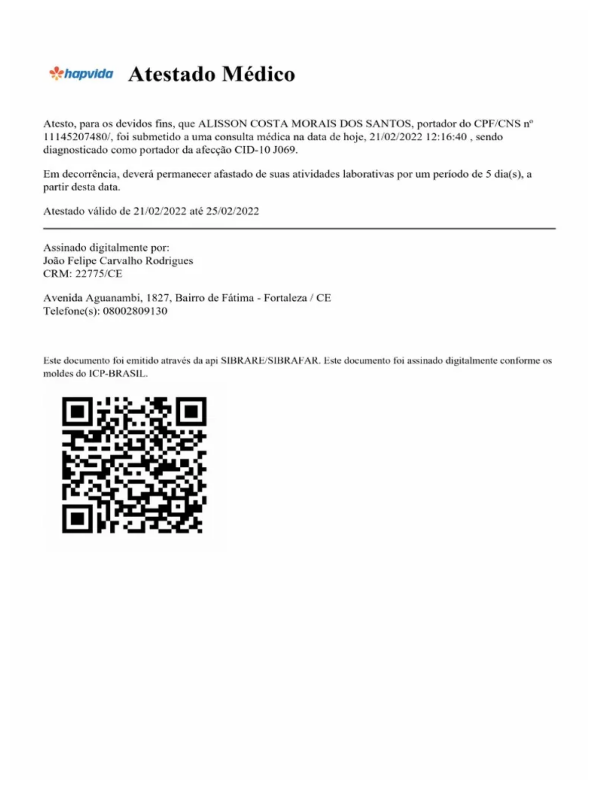

In [6]:
for imagem in caminho:
  imagem = cv2.imread(imagem)
  mostrar(imagem)


In [7]:
config_tesseract = "--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata"

def OCR_processa(img, config_tesseract):
  texto = pytesseract.image_to_string(img, lang='por', config=config_tesseract)
  return texto



In [8]:
texto_completo = ''
nome_txt = 'resultados_ocr.txt'


In [9]:
print(config_tesseract)

--tessdata-dir /usr/share/tesseract-ocr/4.00/tessdata


In [13]:
for imagem in caminho: # percorre as imagens no caminho
  img = cv2.imread(imagem)
  nome_imagem = os.path.split(imagem)[-1] ## recebe os nomes e diretórios das imagens, quebrados, precisamos apenas do -1 (última posição do diretório)
  nome_divisao = '===================\n' + str(nome_imagem) #divisão + nome da imagem que está sendo vista
  texto_completo = texto_completo + nome_divisao + '\n' # recebe o texto completo + a divisão + /n para pular a linha
  texto = OCR_processa(img, config_tesseract) #passa a imagem que vamos utilizar, no caso em cada imagem
  texto_completo = texto_completo + texto # concatena as duas variáveis


In [ ]:
texto_completo


'===================\nimagem.png\n \n\nhopvida Atestado Médico\n\n \n\nAtesto, para os devido:\n11145207480/, foi submetido a uma consulta médic\ndiagnosticado como portador da afe\n\nque ALISSON COSTA MORAIS DOS SANTOS, portador do CPF/CNS nº\nna data de hoje, 21/02/2022 12:16:40 , sendo\njo CID-10 069.\n\n \n\n   \n\n  \n\nEm decorrência, deverá permanecer afastado de suas atividades laborativas por um período de 5 dia(s), a\npartir desta data.\n\nAtestado válido de 21/02/2022 até 25/02/2022\n\n \n\nAssinado digitalmente por:\nJoão Felipe Carvalho Rodrigues\nCRM: 22775/CE\n\nAvenida Aguanambi, 1827, Bairro de Fátima - Fortaleza / CE\nTelefone(s): 08002809130\n\nEste documento foi emitido através da api SIBRARE/SIBRAFAR. Este documento foi assinado digitalmente conforme os\nmoldes do ICP-BRASIL\n\n \n\x0c'

In [14]:
## Salvando o arquivo em txt
arquivo_txt = open(nome_txt, 'w+') # a+ é para colocar no final do arquivo, w+ para sobre escrever o arquivo
arquivo_txt.write(texto_completo + '\n') #passa o texto que quer adicionar
arquivo_txt.close()

In [ ]:
termo_pesquisa = 'Remala'


In [ ]:
with open(nome_txt) as f: # abre o documento txt
  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, f.read())] #ocorrencia é uma lista.
  #inicia-se em i e o termo re é de expressões regulares, o módulo finditer é para encontrar um termo de pesquisa dentro do arquivo
  #por isso os parâmetros são, respectivamente, termo_pesquisa e arquivo a ser lido.


In [ ]:
ocorrencias


[69]

In [ ]:
for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('====================\n' + str(nome_imagem)) # separação + nome da imagem

  texto = OCR_processa(img, config_tesseract) #usando o OCR

  ocorrencias = [i.start() for i in re.finditer(termo_pesquisa, texto)] #usando o finditer novamente no texto

  print('Número de ocorrências para o termo: {}: {}'.format(termo_pesquisa, len(ocorrencias)))
  #primeira chaves é para termo de pesquisa e a segunda é para ocorrencias
  print('\n')



img-calu.png
Número de ocorrências para o termo: Remala: 1




In [ ]:
fonte_dir = '/content/Projeto/calibri.ttf'


In [ ]:
def escreve_texto(texto, x, y, img, fonte_dir, cor=(50, 50, 255), tamanho=16):
  fonte = ImageFont.truetype(fonte_dir, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y-tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)

  return img


In [ ]:
min_conf = 7  #@param {type:"slider", min:0, max:100}


In [ ]:
def caixa_texto(i, resultado, img, cor=(255, 100, 0)):
  x = resultado["left"][i]
  y = resultado["top"][i]
  w = resultado["width"][i]
  h = resultado["height"][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img


In [ ]:
def OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf):
  resultado = pytesseract.image_to_data(img, config=config_tesseract, lang='por', output_type=Output.DICT) #imagem para dados, que já fizemos anteriormente
  num_ocorrencias = 0 #inicializando como 0

  for i in range(0, len(resultado['text'])): # vai de 0 ao tamanho do número de valores do texto
    confianca = int(resultado['conf'][i]) # qual a confiança da detecção
    if confianca > min_conf: # se a confiança for maior que o valor mínimo, passa para a linha abaixo
      texto = resultado['text'][i] #texto será igual ao resultado text no momento i
      if termo_pesquisa in texto: #se o termo de pesquisa estiver no texto:
        x, y, img = caixa_texto(i, resultado, img, (0,0,255)) # faz a caixa de bounding box
        img = escreve_texto(texto, x, y, img, fonte_dir, (50,50,225), 14) #escreve o texto

        num_ocorrencias += 1 #faz a iteração no num de ocorrências e volta para o laço até acabar o texto
  return img, num_ocorrencias


In [ ]:
from PIL import ImageFont, ImageDraw, Image

fonte = '/content/Projeto/calibri.ttf'

In [ ]:
print(img)


img-calu.png
Número de ocorrências para Silese em img-calu.png: 1




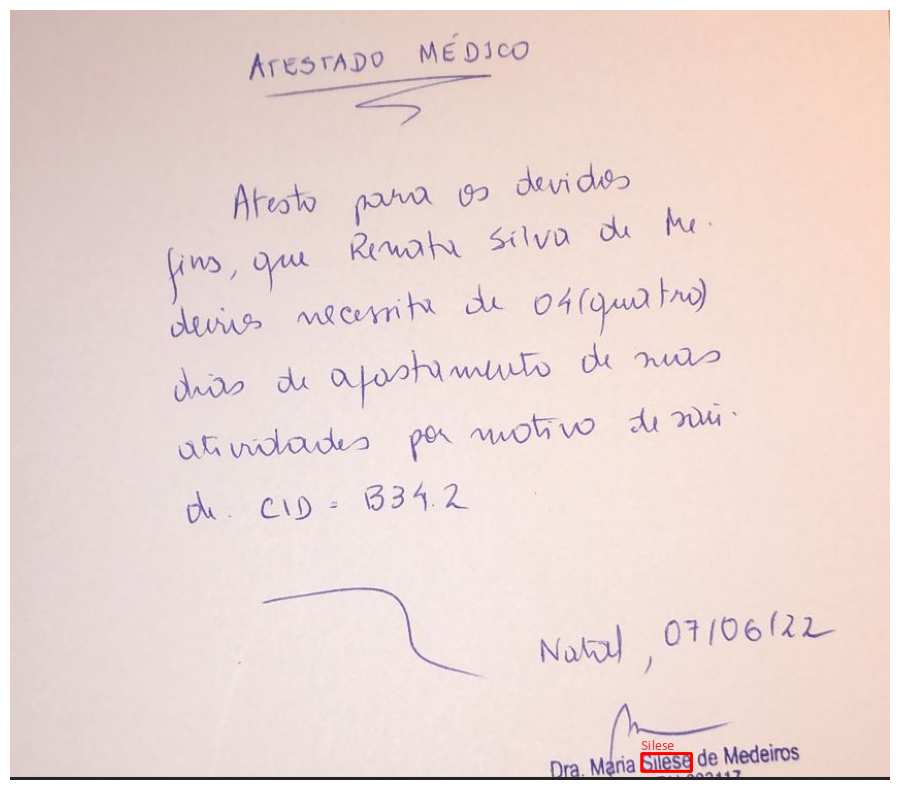

In [ ]:
termo_pesquisa = 'Silese'

for imagem in caminho:
  img = cv2.imread(imagem) #carrega a imagem
  img_original = img.copy() #cria uma cópia da imagem para não escrever em cima da original

  nome_imagem = os.path.split(imagem)[-1] # passa a imagem e acessa a última posição do diretório
  print('===================\n' + str(nome_imagem))  # separação + nome da imagem

  img, numero_ocorrencias = OCR_processa_imagem(img, termo_pesquisa, config_tesseract, min_conf) #usando o OCR_processa_imagem
  print('Número de ocorrências para {} em {}: {}'.format(termo_pesquisa, nome_imagem, numero_ocorrencias))
    #primeira chaves é para termo de pesquisa e a segunda nome das imagens e a terceira é o numeros de ocorrencias
  print('\n')

  mostrar(img)
